# Week 8: Support Vector Machines



In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mat = pd.read_csv('WBC.csv')
mat.drop('Unnamed: 0', axis=1, inplace=True)
df = mat

#### (1) Choose any two variables and plot them against cell identity (in color). Do you see clear separation of these classes? What does this tell you about whether or not you can classify the cells if differing type?

In [7]:
# Drop out the cell-type labels
cellData = df.drop('Sample', axis = 1)

# Get the cell types as strings
cellType = set(df['Sample'])
print(cellType)

{'HL60', 'MCF7', 'WBC'}


Text(0.5,0,'V4')

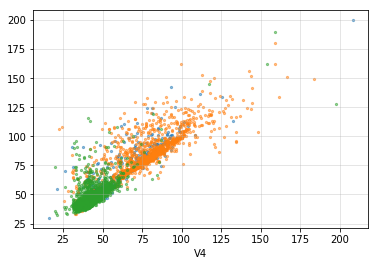

In [18]:
WB_bool = (df.Sample == 'WBC')
MC_bool = (df.Sample == 'MCF7')
HL_bool = (df.Sample == 'HL60')

# convert to {0,1}
WB_indx = WB_bool.astype(int)

# for indx in [WB_bool, MC_bool, HL_bool]:
#     plt.scatter(df.loc[indx, 'V1'], df.loc[indx, 'V8'])
#     # pick 2 variables; plot against each other (for same cell type)
#     # plot them
    
for indx in list(cellType):
    cellTypeIndx = df['Sample'] == indx
    plt.scatter(df.loc[cellTypeIndx, 'V4'],df.loc[cellTypeIndx, 'V11'], s=5, alpha = 0.5)
    # pick 2 variables; plot against (for same cell type)
plt.grid(alpha = 0.4)

plt.xlabel('V4')
plt.yabel

#### (3) Use principal components analysis to visualize the variation in each variable. Plot the first two principal components against the cell type. Do you see better separation in this case? What does this tell you about your ability to distinguish the cell types?

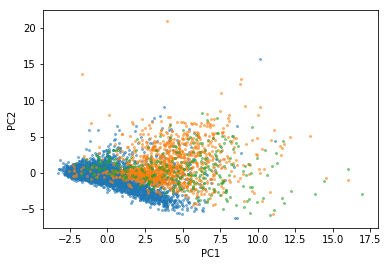

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
# convert dataframe to matrix
X_data = cellData.as_matrix()
# normalize the data first!
X_datscale = scale(X_data)

X_PCs = pca.fit_transform(X_datscale)

for indx in [WB_bool, MC_bool, HL_bool]:
    plt.scatter(X_PCs[indx,0], X_PCs[indx,1], s=4, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#### (4) How does partial least squares fare in desciminating cancer and non-cancer cells (make cancer=1 and non-cancer=0; this is called PLS-DA)? How does this relate to the results in the previous questions?

In [ ]:
from sklearncross_decomposition import PLSRegression

# run PLSR on X_data(scaled)
# make a figure to illustrate

#### (5) Setup a support vector machine classifier (with linear kernel) to distinguish cancer and non-cancer.

Evaluate how well this performs (hint: think carefully about how you evaluate the model).

In [3]:
from sklearn import svm
svm_L = svm.LinearSVC()


#### (6) Choose and justify your selection of a different kernel to use in SVM classification. (Hint: It should be a kernel with varying complexity, such as polynomial or RBF.)

In [ ]:
# Answer
kls = ['poly', 'rbf', 'sigmoid']
kl = kls[0]
svm_K = svm.SVC(kernel=kl)

#### (7) Vary the complexity of your kernel and evaluate the ability of it to descriminate data both directly and on crossvalidation.

How does the answer of which classification strategy vary based on whether you are performing cross-validation?

In [ ]:
# Answer
# C, gamma, degree
from sklearn.model_selection import * #star means give me all modules from this package

#### (8) Your experimental collaborator asks you to determine whether she can collect a fewer number of measurements (cells) and still obtain the same classification efficiency when building a new estimator. How might you determine this? Can she?

In [ ]:
# Answer

#### (9) What if you can change the numbers of individual cell types that you collect? Is the model you obtain sensitive to the number of cells in each group to the same extent?

In [ ]:
# Answer

#### (10) Your collaborator collects completely new data and brings it to you for classification. You take your chosen optimal model from (7) and classify each cell. Would you expect your model to perform better, identically, or slightly worse than before? Why?

In [ ]:
# Answer

#### (11) Assume these measurements are identical to patient data one would obtain for a patient with cancer. Also, as a prior distribution, assume that, among patients coming in for testing, 99% are cancer-free in the end. Estimate how many cells would need to be analyzed on average to make a confident diagnosis of cancer.

Hint: You'll need a confidence in your prediction as to whether or not each cell is cancerous.

In [ ]:
# Answer
# P(cancer) = 0.01
#P()